<a href="https://colab.research.google.com/github/rocio-perez-sbarato/SocioHackaton/blob/main/graficos_poblacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerías

In [ ]:
library(ggplot2)
library(dplyr)
library(tidyr)
# Instalar y cargar la librería writexl
install.packages("writexl")

library(writexl)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Extranjeros por provincia

In [ ]:
# Crear un nuevo dataframe solo con las columnas de electricidad
extranjeros_por_provincia <- escuelas_con_extranjeros %>%
  # Calcular las cantidades por provincia
  group_by(provincia) %>%
  summarise(
    cantidad_escuelas_con_extranjeros = n()
  ) %>%
  # Calcular los porcentajes
  mutate(
    porcentaje_escuelas_por_provincia = round((cantidad_escuelas_con_extranjeros / nrow(escuelas_con_extranjeros)) * 100, 2)
  )

# Mostrar los resultados
head(extranjeros_por_provincia)

# Guardar las tablas en archivos .csv
write.csv(extranjeros_por_provincia, "extranjeros_por_provincia.csv", row.names = FALSE, fileEncoding = "UTF-8")

# Calcular las escuelas con extranjeros y sin extranjeros

- Primero tenemos que calcular los extranjeros por escuela
- Después, filtramos las escuelas que no tienen ningún alumno extranjero

In [ ]:

# Cargar la base de datos
poblacion <- read.csv("Poblacion.csv", sep = ";", fileEncoding = "ISO-8859-1")

# Solo por si hace falta
poblacion$provincia <- iconv(poblacion$provincia, from = "latin1", to = "UTF-8")
poblacion$provincia <- gsub("Ã³", "ó", poblacion$provincia)
poblacion$provincia <- gsub("Ã­", "í", poblacion$provincia)
poblacion$provincia <- gsub("Ã©", "é", poblacion$provincia)
poblacion$provincia <- gsub("Ãº", "ú", poblacion$provincia)
poblacion$provincia <- gsub("Ã±", "ñ", poblacion$provincia)
poblacion$provincia <- gsub("Ã¡", "á", poblacion$provincia)

# Definir las columnas que contienen los datos de extranjeros
columnas_extranjeros <- c(
  'Bolivia...Primaria','Paraguay...Primaria', 'Perú...Primaria', 'Venezuela...Primaria',
  'Bolivia...Secundaria', 'Paraguay...Secundaria','Perú...Secundaria', 'Venezuela...Secundaria'
)

# Calcular el total de extranjeros por fila (escuela)
poblacion <- poblacion %>%
  rowwise() %>%
  mutate(total_extranjeros_por_escuela = sum(c_across(all_of(columnas_extranjeros)), na.rm = TRUE))

# Renombrar la columna ID1 a id
poblacion <- poblacion %>%
rename(id = ID1)

extranjeros_por_escuela <- poblacion %>%
  select(id,provincia,sector,ambito,total_extranjeros_por_escuela)

# Guardar la tabla en un .csv
write.csv(extranjeros_por_escuela, "extranjeros_por_escuela_2015.csv", row.names = FALSE, fileEncoding = "UTF-8")

escuelas_con_extranjeros <- extranjeros_por_escuela %>%
  filter(total_extranjeros_por_escuela > 0)

# Mostrar el resultado
head(escuelas_con_extranjeros, 10)  # Muestra las primeras 10 filas

# Guardar la tabla en un .csv
write.csv(escuelas_con_extranjeros, "escuelas_con_extranjeros_2015.csv", row.names = FALSE, fileEncoding = "UTF-8")

# Filtrar las escuelas sin extranjeros
escuelas_sin_extranjeros <- poblacion %>%
  filter(total_extranjeros_por_escuela == 0) %>%
  select(id, provincia, sector, ambito, total_extranjeros_por_escuela)

# Guardar la tabla en un .csv
write.csv(escuelas_sin_extranjeros, "escuelas_sin_extranjeros_2015.csv", row.names = FALSE, fileEncoding = "UTF-8")

# Mostrar el resultado
head(escuelas_sin_extranjeros, 10)  # Muestra las primeras 10 filas

id,provincia,sector,ambito,total_extranjeros_por_escuela
<dbl>,<chr>,<chr>,<chr>,<int>
3.600400e+13,Tucumán,Estatal,Urbano,1
1.000552e+14,Ciudad de Buenos Aires,Privado,Urbano,8
1.001515e+14,Ciudad de Buenos Aires,Estatal,Urbano,30
1.001700e+14,Ciudad de Buenos Aires,Estatal,Urbano,46
1.001700e+14,Entre Ríos,Privado,Urbano,1
1.001700e+14,Jujuy,Estatal,Rural,3
1.001700e+14,Mendoza,Estatal,Urbano,6
1.001700e+14,Mendoza,Estatal,Urbano,6
1.001700e+14,Buenos Aires,Estatal,Urbano,5


id,provincia,sector,ambito,total_extranjeros_por_escuela
<dbl>,<chr>,<chr>,<chr>,<int>
2.0004e+13,Mendoza,Estatal,Urbano,0
2.0008e+13,Mendoza,Privado,Urbano,0
2.1604e+13,Misiones,Estatal,Urbano,0
2.6404e+13,Salta,Estatal,Rural,0
3.2804e+13,Santa Fe,Estatal,Rural,0
3.2808e+13,Santa Fe,Estatal,Rural,0
3.2812e+13,Santa Fe,Estatal,Urbano,0
3.2816e+13,Santa Fe,Estatal,Urbano,0
3.4404e+13,Santiago del Estero,Estatal,Rural,0


# Sector

## Nacional

In [ ]:
# ================================================================
# TOTAL
# ================================================================

# Calcular la cantidad de escuelas privadas y estatales de los colegios
conteo_sector_escuelas_total <- poblacion %>%
  group_by(sector) %>%
  summarise(cantidad_escuelas_por_sector = n())

# Calcular el porcentaje de escuelas por sector
total_escuelas_total <- sum(conteo_sector_escuelas_total$cantidad_escuelas_por_sector)
conteo_sector_escuelas_total <- conteo_sector_escuelas_total %>%
  mutate(porcentaje_escuelas_por_sector = round((cantidad_escuelas_por_sector / total_escuelas_total) * 100, 2))

# ================================================================
# EXTRANJEROS
# ================================================================

# Calcular la cantidad de escuelas privadas y estatales de los colegios con extranjeros
conteo_sector_escuelas_extranjeros <- escuelas_con_extranjeros %>%
  group_by(sector) %>%
  summarise(cantidad_escuelas_por_sector = n())

# Calcular el porcentaje de escuelas con extranjeros por sector
total_escuelas_extranjeros <- sum(conteo_sector_escuelas_extranjeros$cantidad_escuelas_por_sector)
conteo_sector_escuelas_extranjeros <- conteo_sector_escuelas_extranjeros %>%
  mutate(porcentaje_escuelas_por_sector = round((cantidad_escuelas_por_sector / total_escuelas_extranjeros) * 100, 2))

# ================================================================
# SIN EXTRANJEROS
# ================================================================

# Calcular la cantidad de escuelas privadas y estatales de los colegios sin extranjeros
conteo_sector_escuelas_sin_extranjeros <- escuelas_sin_extranjeros %>%
  group_by(sector) %>%
  summarise(cantidad_escuelas_por_sector = n())

# Calcular el porcentaje de escuelas sin extranjeros por sector
total_escuelas_sin_extranjeros <- sum(conteo_sector_escuelas_sin_extranjeros$cantidad_escuelas_por_sector)
conteo_sector_escuelas_sin_extranjeros <- conteo_sector_escuelas_sin_extranjeros %>%
  mutate(porcentaje_escuelas_por_sector = round((cantidad_escuelas_por_sector / total_escuelas_sin_extranjeros) * 100, 2))

# ================================================================
# MOTRAR RESULTADOS Y EXPORTAR CSV
# ================================================================

# Guardar el resultado en un archivo CSV
write.csv(conteo_sector_escuelas_total, "conteo_sector_escuelas_total.csv", row.names = FALSE)
write.csv(conteo_sector_escuelas_extranjeros, "conteo_sector_escuelas_extranjeros.csv", row.names = FALSE)
write.csv(conteo_sector_escuelas_sin_extranjeros, "conteo_sector_escuelas_sin_extranjeros.csv", row.names = FALSE)

# Mostrar las primeras filas de cada resultado para verificar
head(conteo_sector_escuelas_total)
head(conteo_sector_escuelas_extranjeros)
head(conteo_sector_escuelas_sin_extranjeros)


sector,cantidad_escuelas_por_sector,porcentaje_escuelas_por_sector
<chr>,<int>,<dbl>
Estatal,37567,77.81
Privado,10716,22.19


sector,cantidad_escuelas_por_sector,porcentaje_escuelas_por_sector
<chr>,<int>,<dbl>
Estatal,7910,78.09
Privado,2219,21.91


sector,cantidad_escuelas_por_sector,porcentaje_escuelas_por_sector
<chr>,<int>,<dbl>
Estatal,29657,77.73
Privado,8497,22.27


## Provincial

In [ ]:
# ================================================================
# PROVINCIA: TOTAL
# ================================================================

# Calcular la cantidad de escuelas por sector en cada provincia
cantidad_escuelas_por_sector_y_provincia <- poblacion %>%
  group_by(provincia, sector) %>%
  summarise(cantidad_escuelas_por_sector_y_provincia = n(), .groups = "drop")

# Calcular el porcentaje de escuelas por sector y provincia
total_escuelas_por_provincia <- cantidad_escuelas_por_sector_y_provincia %>%
  group_by(provincia) %>%
  summarise(total_escuelas = sum(cantidad_escuelas_por_sector_y_provincia))

cantidad_escuelas_por_sector_y_provincia <- cantidad_escuelas_por_sector_y_provincia %>%
  left_join(total_escuelas_por_provincia, by = "provincia") %>%
  mutate(porcentaje_escuelas_por_sector_y_provincia = round((cantidad_escuelas_por_sector_y_provincia / total_escuelas) * 100, 2)) %>%
  select(-total_escuelas)

# ================================================================
# PROVINCIA: EXTRANJEROS
# ================================================================

# Calcular la cantidad de escuelas con extranjeros por sector en cada provincia
cantidad_escuelas_por_sector_y_provincia_extranjeros <- escuelas_con_extranjeros %>%
  group_by(provincia, sector) %>%
  summarise(cantidad_escuelas_por_sector_y_provincia = n(), .groups = "drop")

# Calcular el porcentaje de escuelas con extranjeros por sector y provincia
total_escuelas_por_provincia_extranjeros <- cantidad_escuelas_por_sector_y_provincia_extranjeros %>%
  group_by(provincia) %>%
  summarise(total_escuelas_extranjeros = sum(cantidad_escuelas_por_sector_y_provincia))

cantidad_escuelas_por_sector_y_provincia_extranjeros <- cantidad_escuelas_por_sector_y_provincia_extranjeros %>%
  left_join(total_escuelas_por_provincia_extranjeros, by = "provincia") %>%
  mutate(porcentaje_escuelas_por_sector_y_provincia_extranjeros = round((cantidad_escuelas_por_sector_y_provincia / total_escuelas_extranjeros) * 100, 2)) %>%
  select(-total_escuelas_extranjeros)

# ================================================================
# PROVINCIA: SIN EXTRANJEROS
# ================================================================

# Calcular la cantidad de escuelas sin extranjeros por sector en cada provincia
cantidad_escuelas_por_sector_y_provincia_sin_extranjeros <- escuelas_sin_extranjeros %>%
  group_by(provincia, sector) %>%
  summarise(cantidad_escuelas_por_sector_y_provincia = n(), .groups = "drop")

# Calcular el porcentaje de escuelas sin extranjeros por sector y provincia
total_escuelas_por_provincia_sin_extranjeros <- cantidad_escuelas_por_sector_y_provincia_sin_extranjeros %>%
  group_by(provincia) %>%
  summarise(total_escuelas_sin_extranjeros = sum(cantidad_escuelas_por_sector_y_provincia))

cantidad_escuelas_por_sector_y_provincia_sin_extranjeros <- cantidad_escuelas_por_sector_y_provincia_sin_extranjeros %>%
  left_join(total_escuelas_por_provincia_sin_extranjeros, by = "provincia") %>%
  mutate(porcentaje_escuelas_por_sector_y_provincia_sin_extranjeros = round((cantidad_escuelas_por_sector_y_provincia / total_escuelas_sin_extranjeros) * 100, 2)) %>%
  select(-total_escuelas_sin_extranjeros)

# ================================================================
# MOTRAR RESULTADOS Y EXPORTAR CSV
# ================================================================

# Guardar el resultado en un archivo CSV
write.csv(cantidad_escuelas_por_sector_y_provincia, "cantidad_escuelas_por_sector_y_provincia.csv", row.names = FALSE)
write.csv(cantidad_escuelas_por_sector_y_provincia_extranjeros, "cantidad_escuelas_por_sector_y_provincia_extranjeros.csv", row.names = FALSE)
write.csv(cantidad_escuelas_por_sector_y_provincia_sin_extranjeros, "cantidad_escuelas_por_sector_y_provincia_sin_extranjeros.csv", row.names = FALSE)

# Mostrar las primeras filas de cada resultado para verificar
head(cantidad_escuelas_por_sector_y_provincia)
head(cantidad_escuelas_por_sector_y_provincia_extranjeros)
head(cantidad_escuelas_por_sector_y_provincia_sin_extranjeros)

provincia,sector,cantidad_escuelas_por_sector_y_provincia,porcentaje_escuelas_por_sector_y_provincia
<chr>,<chr>,<int>,<dbl>
Buenos Aires,Estatal,11077,68.34
Buenos Aires,Privado,5131,31.66
Catamarca,Estatal,939,96.31
Catamarca,Privado,36,3.69
Chaco,Estatal,1803,89.66
Chaco,Privado,208,10.34


provincia,sector,cantidad_escuelas_por_sector_y_provincia,porcentaje_escuelas_por_sector_y_provincia_extranjeros
<chr>,<chr>,<int>,<dbl>
Buenos Aires,Estatal,4208,75.90
Buenos Aires,Privado,1336,24.10
Catamarca,Estatal,18,94.74
Catamarca,Privado,1,5.26
Chaco,Estatal,55,76.39
Chaco,Privado,17,23.61


provincia,sector,cantidad_escuelas_por_sector_y_provincia,porcentaje_escuelas_por_sector_y_provincia_sin_extranjeros
<chr>,<chr>,<int>,<dbl>
Buenos Aires,Estatal,6869,64.41
Buenos Aires,Privado,3795,35.59
Catamarca,Estatal,921,96.34
Catamarca,Privado,35,3.66
Chaco,Estatal,1748,90.15
Chaco,Privado,191,9.85


## Excel

In [ ]:
# Guardar los resultados en archivos Excel
write_xlsx(list("Total" = conteo_sector_escuelas_total,
                "Con Extranjeros" = conteo_sector_escuelas_extranjeros,
                "Sin Extranjeros" = conteo_sector_escuelas_sin_extranjeros,
                "Por Provincia" = cantidad_escuelas_por_sector_y_provincia,
                "Por Provincia con Extranjeros" = cantidad_escuelas_por_sector_y_provincia_extranjeros,
                "Por Provincia sin Extranjeros" = cantidad_escuelas_por_sector_y_provincia_sin_extranjeros),
           "sector_2015.xlsx")

## Gráficos

- Se crean usando la función `pie()`
- Referencias: https://soka.gitlab.io/blog/post/2019-02-14-diagramas-de-tarta-en-r/

### Total

pdf 
  2

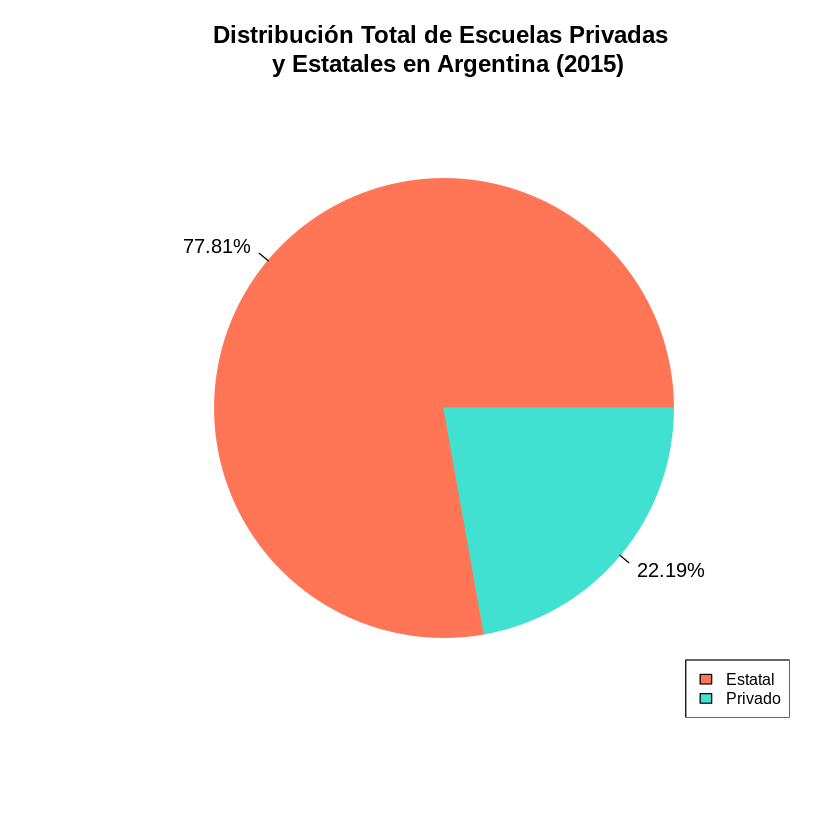

In [ ]:

# Extraer los porcentajes y sectores
porcentajes <- conteo_sector_escuelas_total$porcentaje_escuelas_por_sector
sectores <- conteo_sector_escuelas_total$sector

# Definir colores para los sectores
colors <- c('#ff7555', '#41e1d1')

# Crear gráfico de torta con los porcentajes
pie(porcentajes, labels = paste0(round(porcentajes, 2), "%"), col = colors, main = "Distribución Total de Escuelas Privadas \n y Estatales en Argentina (2015)", border = colors)

# Agregar la leyenda
legend("bottomright", legend = sectores, fill = colors, cex = 0.8)

# Guardar el gráfico como imagen
png("grafico_torta_escuelas_sector_2015.png", width = 500, height = 500)
pie(porcentajes, labels = paste0(round(porcentajes, 2), "%"), col = colors, main = "Distribución Total de Escuelas Privadas \n y Estatales en Argentina (2015)", border = colors)
legend("bottomright", legend = sectores, fill = colors, cex = 0.8)
dev.off()  # Cerrar el dispositivo gráfico para guardar la imagen


Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


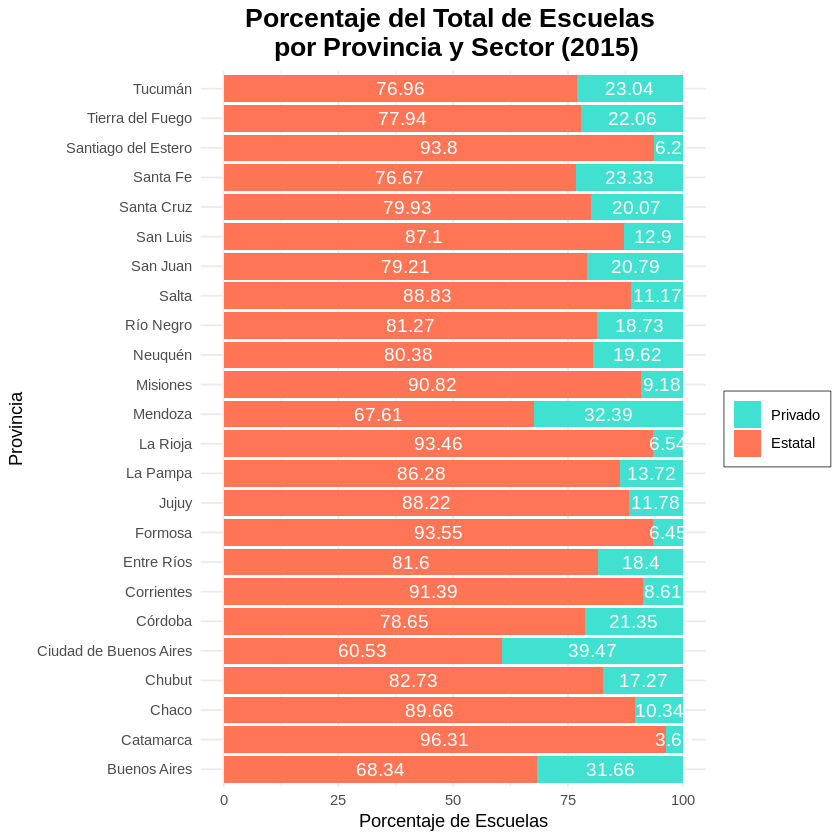

In [ ]:
# Ejemplo de datos
df <- data.frame(
  provincia = cantidad_escuelas_por_sector_y_provincia$provincia,
  sector = cantidad_escuelas_por_sector_y_provincia$sector,
  cantidad_escuelas = cantidad_escuelas_por_sector_y_provincia$cantidad_escuelas_por_sector_y_provincia,  # Accediendo directamente desde el CSV
  porcentaje = cantidad_escuelas_por_sector_y_provincia$porcentaje_escuelas_por_sector_y_provincia
)

# Asegurarse de que el sector estatal aparezca primero
df$sector <- factor(df$sector, levels = c("Privado", "Estatal"))

# Crear el gráfico de barras apiladas en orientación horizontal
ggplot(df, aes(fill = sector, x = provincia, y = porcentaje)) +
  geom_bar(position = 'stack', stat = 'identity') +  # Mantener 'stack' para apilar
  geom_text(aes(label = round(porcentaje, 2)),  # Redondear el porcentaje a 1 decimal
            position = position_stack(vjust = 0.5),  # Ajustar el texto en el centro
            color = "white",  # Color del texto
            size = 4) +  # Ajustar tamaño de texto
  theme_minimal() +
  labs(x = 'Provincia', y = 'Porcentaje de Escuelas', title = 'Porcentaje del Total de Escuelas \n por Provincia y Sector (2015)') +
  theme(plot.title = element_text(hjust = 0.5, size = 16, face = 'bold'),
        legend.title = element_blank(),  # Eliminar el título de la leyenda
        legend.background = element_rect(size = 0.2)) +  # Fondo gris para la leyenda
  scale_fill_manual('Sector', values = c('#41e1d1', '#ff7555')) +
  coord_flip()  # Voltear el gráfico para que sea horizontal (Estatal a la izquierda)

# Guardar el gráfico con ggsave
ggsave("porcentaje_de_escuelas_por_provincia_sector_2015.png", width = 8, height = 8, dpi = 300, bg = "white")


### Extranjeros

pdf 
  2

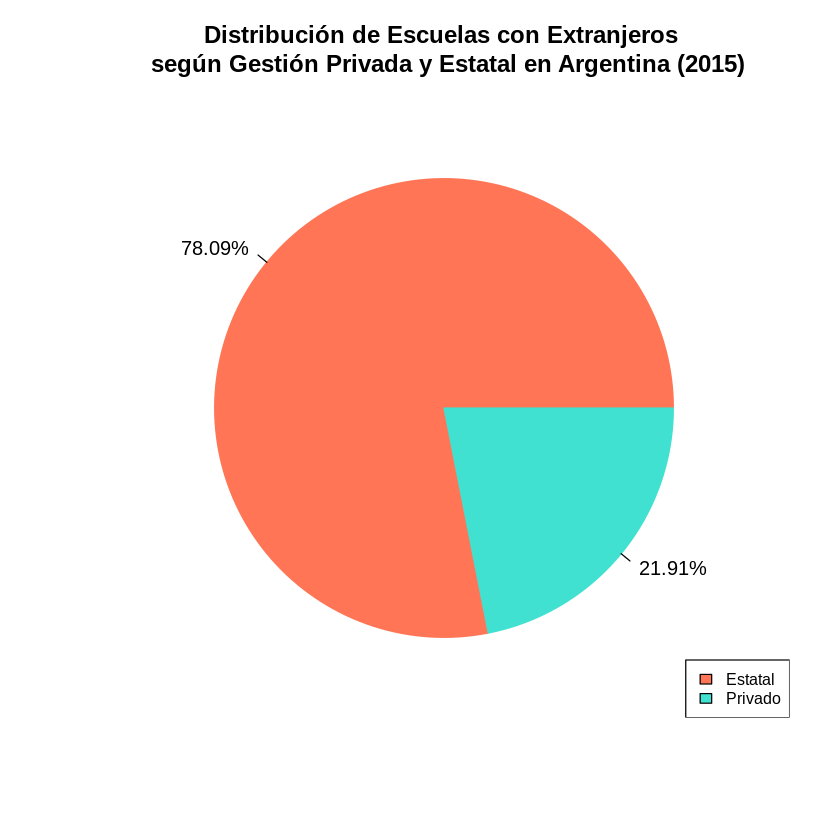

In [ ]:

# Extraer los porcentajes y sectores
porcentajes <- conteo_sector_escuelas_extranjeros$porcentaje_escuelas_por_sector
sectores <- conteo_sector_escuelas_extranjeros$sector

# Definir colores para los sectores
colors <- c('#ff7555', '#41e1d1')

# Crear gráfico de torta con los porcentajes
pie(porcentajes, labels = paste0(round(porcentajes, 2), "%"), col = colors, main = "Distribución de Escuelas con Extranjeros \n según Gestión Privada y Estatal en Argentina (2015)", border = colors)

# Agregar la leyenda
legend("bottomright", legend = sectores, fill = colors, cex = 0.8)

# Guardar el gráfico como imagen
png("grafico_torta_escuelas_sector_extranjeros_2015.png", width = 500, height = 500)
pie(porcentajes, labels = paste0(round(porcentajes, 2), "%"), col = colors, main = "Distribución de Escuelas con Extranjeros \n según Gestión Privada y Estatal en Argentina (2015)", border = colors)
legend("bottomright", legend = sectores, fill = colors, cex = 0.8)
dev.off()  # Cerrar el dispositivo gráfico para guardar la imagen

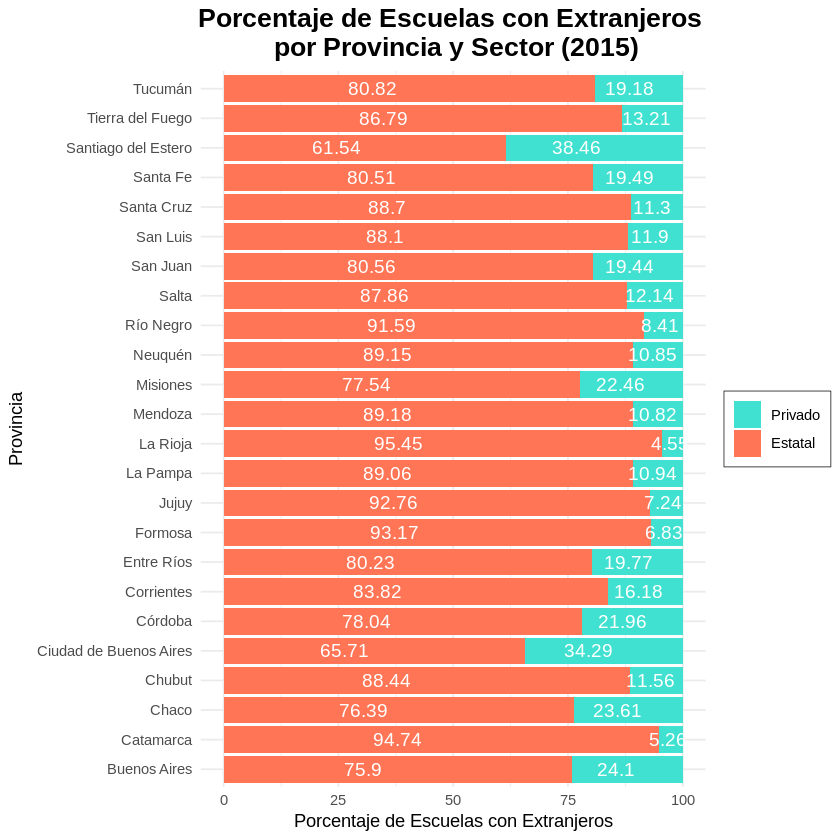

In [ ]:
# Ejemplo de datos
df <- data.frame(
  provincia = cantidad_escuelas_por_sector_y_provincia_extranjeros$provincia,
  sector = cantidad_escuelas_por_sector_y_provincia_extranjeros$sector,
  cantidad_escuelas = cantidad_escuelas_por_sector_y_provincia_extranjeros$cantidad_escuelas_por_sector_y_provincia,
  porcentaje = cantidad_escuelas_por_sector_y_provincia_extranjeros$porcentaje_escuelas_por_sector_y_provincia_extranjeros
)

# Asegurarse de que el sector estatal aparezca primero
df$sector <- factor(df$sector, levels = c("Privado", "Estatal"))

# Crear el gráfico de barras apiladas en orientación horizontal
ggplot(df, aes(fill = sector, x = provincia, y = porcentaje)) +
  geom_bar(position = 'stack', stat = 'identity') +  # Mantener 'stack' para apilar
  geom_text(aes(label = round(porcentaje, 2)),  # Redondear el porcentaje a 1 decimal
            position = position_stack(vjust = 0.4),  # Centrar el texto en el medio de cada segmento
            color = "white",  # Color del texto
            size = 4) +  # Ajustar tamaño de texto
  theme_minimal() +
  labs(x = 'Provincia', y = 'Porcentaje de Escuelas con Extranjeros', title = 'Porcentaje de Escuelas con Extranjeros \n por Provincia y Sector (2015)') +
  theme(plot.title = element_text(hjust = 0.5, size = 16, face = 'bold'),
        legend.title = element_blank(),  # Eliminar el título de la leyenda
        legend.background = element_rect(size = 0.2)) +  # Fondo gris para la leyenda
  scale_fill_manual('Sector', values = c('#41e1d1', '#ff7555')) +
  coord_flip()  # Voltear el gráfico para que sea horizontal

# Guardar el gráfico con ggsave
ggsave("porcentaje_de_escuelas_por_provincia_sector_extranjeros_2015.png", width = 8, height = 8, dpi = 300, bg = "white")

### Sin extranjeros

pdf 
  2

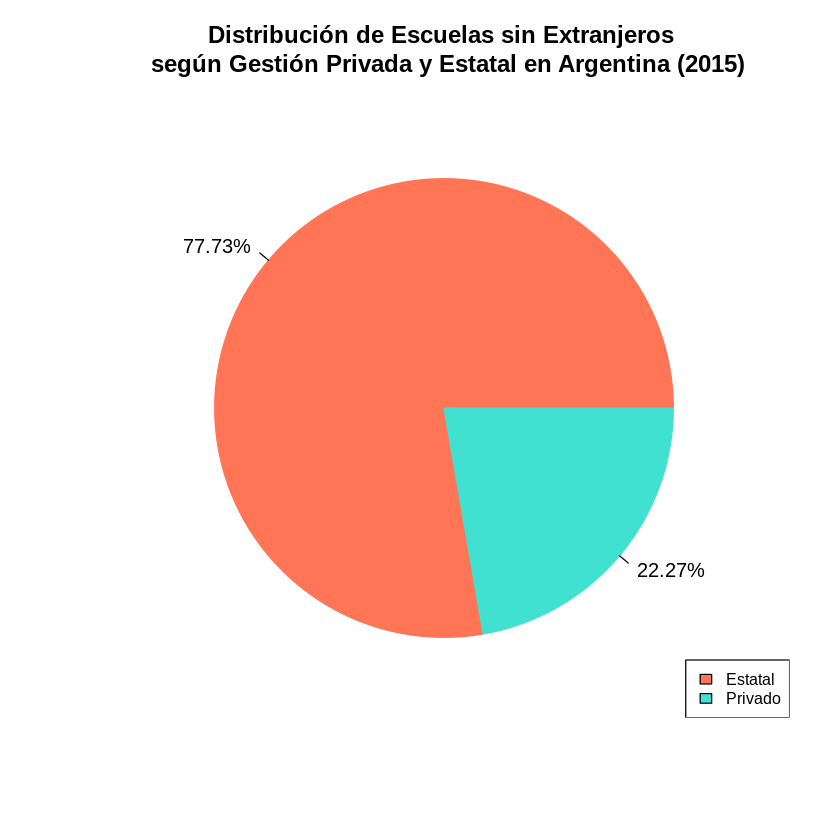

In [ ]:
# Extraer los porcentajes y sectores
porcentajes <- conteo_sector_escuelas_sin_extranjeros$porcentaje_escuelas_por_sector
sectores <- conteo_sector_escuelas_sin_extranjeros$sector

# Definir colores para los sectores
colors <- c('#ff7555', '#41e1d1')

# Crear gráfico de torta con los porcentajes
pie(porcentajes, labels = paste0(round(porcentajes, 2), "%"), col = colors, main = "Distribución de Escuelas sin Extranjeros \n según Gestión Privada y Estatal en Argentina (2015)", border = colors)

# Agregar la leyenda
legend("bottomright", legend = sectores, fill = colors, cex = 0.8)

# Guardar el gráfico como imagen
png("grafico_torta_escuelas_sector_sin_extranjeros_2015.png", width = 500, height = 500)
pie(porcentajes, labels = paste0(round(porcentajes, 2), "%"), col = colors, main = "Distribución de Escuelas sin Extranjeros \n según Gestión Privada y Estatal en Argentina (2015)", border = colors)
legend("bottomright", legend = sectores, fill = colors, cex = 0.8)
dev.off()  # Cerrar el dispositivo gráfico para guardar la imagen

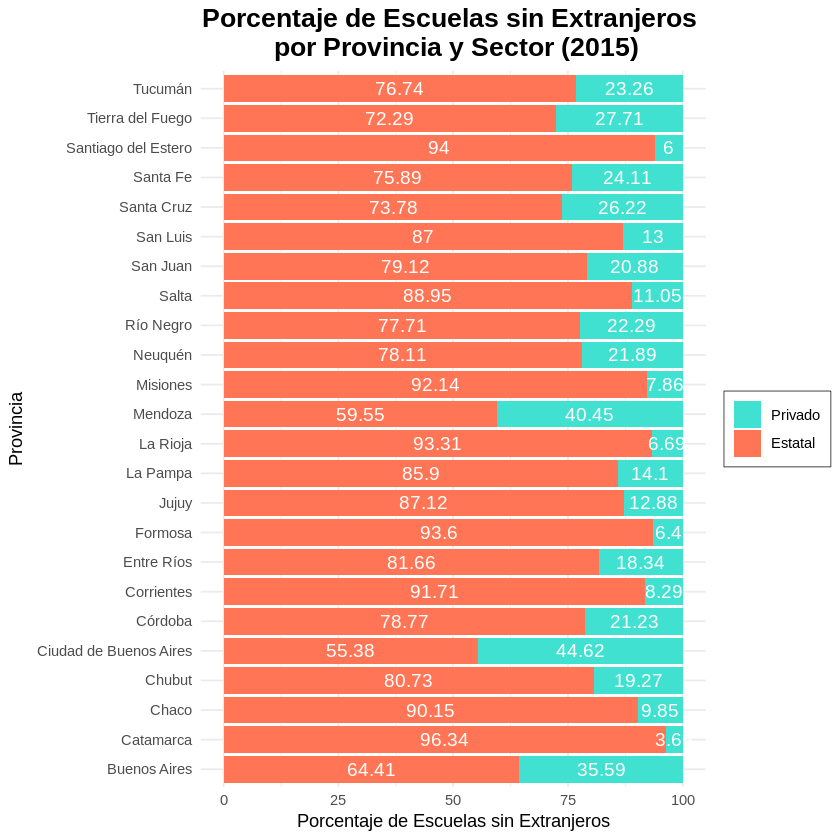

In [ ]:
df <- data.frame(
  provincia = cantidad_escuelas_por_sector_y_provincia_sin_extranjeros$provincia,
  sector = cantidad_escuelas_por_sector_y_provincia_sin_extranjeros$sector,
  cantidad_escuelas = cantidad_escuelas_por_sector_y_provincia_sin_extranjeros$cantidad_escuelas_por_sector_y_provincia,
  porcentaje = cantidad_escuelas_por_sector_y_provincia_sin_extranjeros$porcentaje_escuelas_por_sector_y_provincia_sin_extranjeros
)

# Asegurarse de que el sector estatal aparezca primero
df$sector <- factor(df$sector, levels = c("Privado", "Estatal"))

# Crear el gráfico de barras apiladas en orientación horizontal
ggplot(df, aes(fill = sector, x = provincia, y = porcentaje)) +
  geom_bar(position = 'stack', stat = 'identity') +  # Mantener 'stack' para apilar
  geom_text(aes(label = round(porcentaje, 2)),  # Redondear el porcentaje a 1 decimal
            position = position_stack(vjust = 0.5),  # Centrar el texto en el medio de cada segmento
            color = "white",  # Color del texto
            size = 4) +  # Ajustar tamaño de texto
  theme_minimal() +
  labs(x = 'Provincia', y = 'Porcentaje de Escuelas sin Extranjeros', title = 'Porcentaje de Escuelas sin Extranjeros \n por Provincia y Sector (2015)') +
  theme(plot.title = element_text(hjust = 0.5, size = 16, face = 'bold'),
        legend.title = element_blank(),  # Eliminar el título de la leyenda
        legend.background = element_rect(size = 0.2)) +  # Fondo gris para la leyenda
  scale_fill_manual('Sector', values =  c('#41e1d1', '#ff7555')) +
  coord_flip()  # Voltear el gráfico para que sea horizontal

# Guardar el gráfico con ggsave
ggsave("porcentaje_de_escuelas_por_provincia_sector_sin_extranjeros_2015.png", width = 8, height = 8, dpi = 300, bg = "white")

# Top nacionalidades

In [ ]:
# Seleccionar las columnas relevantes
columnas_pais <- c(
  'Bolivia...Primaria', 'Brasil...Primaria', 'Chile...Primaria', 'Colombia...Primaria',
  'Ecuador...Primaria', 'Paraguay...Primaria', 'Perú...Primaria', 'Uruguay...Primaria',
  'Venezuela...Primaria', 'Otros.países.de.América...Primaria', 'Europa...Primaria',
  'Asia...Primaria', 'Otros...Primaria',
  'Bolivia...Secundaria', 'Brasil...Secundaria', 'Chile...Secundaria',
  'Colombia...Secundaria', 'Ecuador...Secundaria', 'Paraguay...Secundaria',
  'Perú...Secundaria', 'Uruguay...Secundaria', 'Venezuela...Secundaria',
  'Otros.países.de.América...Secundaria', 'Europa...Secundaria',
  'Asia...Secundaria', 'Otros...Secundaria'
)

# Calcular los totales por provincia, país de origen y nivel educativo
totales_por_provincia <- poblacion %>%
  group_by(provincia) %>%
  summarise(across(all_of(columnas_pais), ~ sum(as.numeric(.), na.rm = TRUE), .names = "total_{col}"))

# Mostrar el resultado de totales por provincia
totales_por_provincia

# Sumar cantidad total de extranjeros en todas las provincias
total_extranjeros_pais <- totales_por_provincia %>%
  summarise(total_extranjeros_pais = sum(across(starts_with("total_")), na.rm = TRUE))

# Mostrar el total de extranjeros en el país
total_extranjeros_pais

# Calcular la cantidad total de extranjeros por nacionalidad
extranjeros_por_nacionalidad <- poblacion %>%
  summarise(
    Bolivia = sum(`Bolivia...Primaria`, `Bolivia...Secundaria`, na.rm = TRUE),
    Brasil = sum(`Brasil...Primaria`, `Brasil...Secundaria`, na.rm = TRUE),
    Chile = sum(`Chile...Primaria`, `Chile...Secundaria`, na.rm = TRUE),
    Colombia = sum(`Colombia...Primaria`, `Colombia...Secundaria`, na.rm = TRUE),
    Ecuador = sum(`Ecuador...Primaria`, `Ecuador...Secundaria`, na.rm = TRUE),
    Paraguay = sum(`Paraguay...Primaria`, `Paraguay...Secundaria`, na.rm = TRUE),
    Perú = sum(`Perú...Primaria`, `Perú...Secundaria`, na.rm = TRUE),
    Uruguay = sum(`Uruguay...Primaria`, `Uruguay...Secundaria`, na.rm = TRUE),
    Venezuela = sum(`Venezuela...Primaria`, `Venezuela...Secundaria`, na.rm = TRUE),
    Otros_países_America = sum(`Otros.países.de.América...Primaria`, `Otros.países.de.América...Secundaria`, na.rm = TRUE),
    Europa = sum(`Europa...Primaria`, `Europa...Secundaria`, na.rm = TRUE),
    Asia = sum(`Asia...Primaria`, `Asia...Secundaria`, na.rm = TRUE),
    Otros = sum(`Otros...Primaria`, `Otros...Secundaria`, na.rm = TRUE)
  ) %>%
  pivot_longer(cols = everything(), names_to = "nacionalidad", values_to = "cantidad") %>%
  group_by(nacionalidad) %>% # Agrupación por nacionalidad para sumar duplicados
  filter(cantidad > 0) %>%
  mutate(porcentaje = round((cantidad / sum(cantidad)) * 100, 2))

# Ordenar el dataframe por cantidad y porcentaje de mayor a menor
extranjeros_por_nacionalidad <- extranjeros_por_nacionalidad %>%
  arrange(desc(cantidad), desc(porcentaje))

# Guardar el data frame en un archivo Excel
write_xlsx(extranjeros_por_nacionalidad, "extranjeros_por_nacionalidad_2015.xlsx")

# Mostrar la cantidad total de extranjeros por nacionalidad con porcentajes
extranjeros_por_nacionalidad
print(sum(extranjeros_por_nacionalidad$cantidad))

provincia,total_Bolivia...Primaria,total_Brasil...Primaria,total_Chile...Primaria,total_Colombia...Primaria,total_Ecuador...Primaria,total_Paraguay...Primaria,total_Perú...Primaria,total_Uruguay...Primaria,total_Venezuela...Primaria,⋯,total_Colombia...Secundaria,total_Ecuador...Secundaria,total_Paraguay...Secundaria,total_Perú...Secundaria,total_Uruguay...Secundaria,total_Venezuela...Secundaria,total_Otros.países.de.América...Secundaria,total_Europa...Secundaria,total_Asia...Secundaria,total_Otros...Secundaria
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Buenos Aires,10429,437,356,331,70,19391,2992,561,99,⋯,360,48,17015,2993,729,97,1251,719,187,108
Catamarca,10,1,2,10,0,0,5,3,0,⋯,6,0,5,3,1,1,0,4,0,1
Chaco,3,15,1,65,3,55,7,1,0,⋯,16,1,35,2,2,0,4,12,3,5
Chubut,639,11,76,12,0,185,58,14,5,⋯,11,3,94,30,7,10,83,16,2,3
Ciudad de Buenos Aires,6970,333,153,433,97,4616,3855,254,155,⋯,207,46,3535,3283,278,92,2203,406,321,68
Corrientes,30,29,2,26,3,67,2,3,0,⋯,26,1,28,1,11,0,3,6,3,2
Córdoba,1062,89,64,77,26,265,720,20,17,⋯,62,13,179,636,43,20,221,200,16,12
Entre Ríos,23,20,6,23,1,73,13,82,5,⋯,12,2,33,10,59,2,17,20,8,4
Formosa,3,5,0,10,2,321,2,3,0,⋯,9,0,206,4,1,0,1,0,1,0


total_extranjeros_pais
<dbl>
135904


nacionalidad,cantidad,porcentaje
<chr>,<int>,<dbl>
Otros_países_America,1566,16.73
Otros,910,53.78
Bolivia,619,1.47
Bolivia,417,0.99
Bolivia,367,0.87
Bolivia,325,0.77
Bolivia,281,0.67
Bolivia,255,0.61
Bolivia,235,0.56


[1] 135904
